In [1]:
import branching
from sirs import Sirs
import networkx as nx

# Comportements SIR
## Consommation
Au bout d'une dizaine de tours, la population entière est consomée.

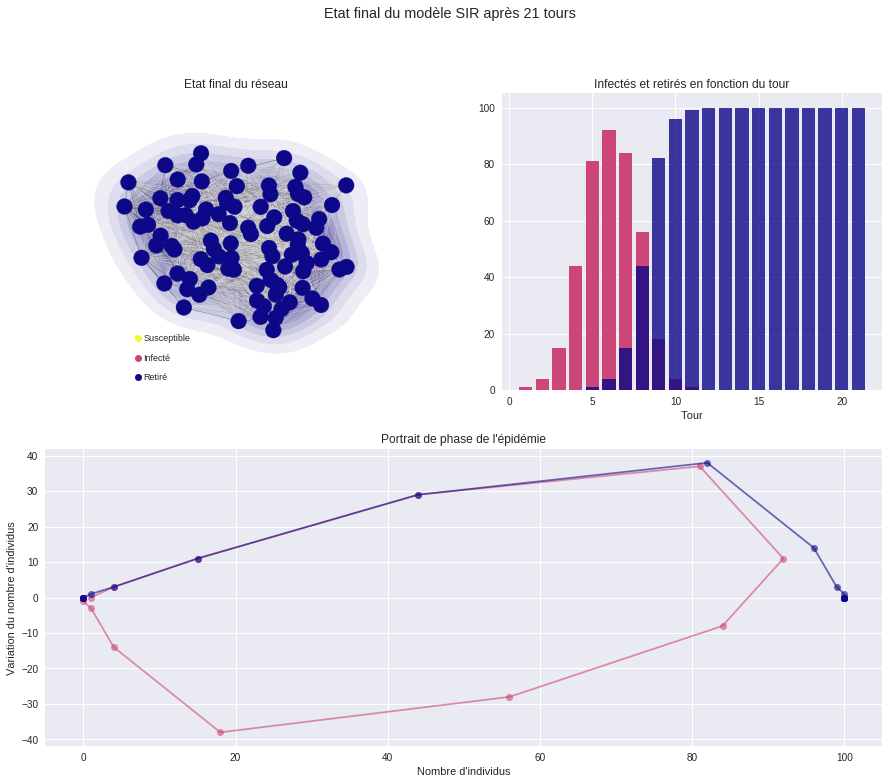

In [2]:
s = Sirs(100, [3, 21], 0.1)
s.increment(20)
s.plot()

## Etouffement
Au bout de quelques (4-5) tours, l'épidémie échoue à se reproduire.

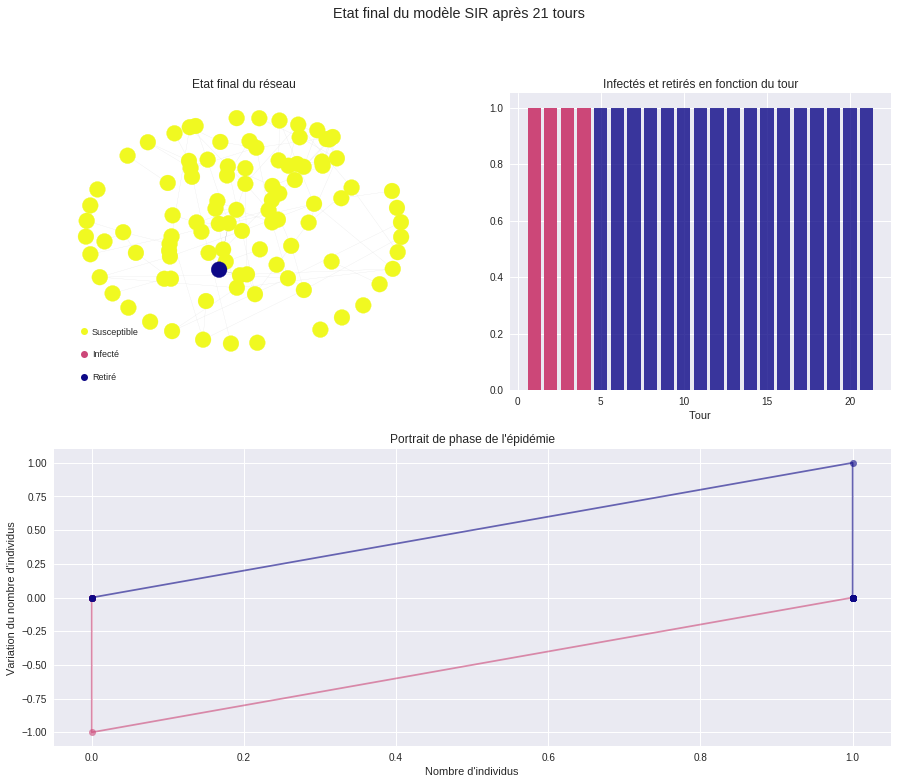

In [3]:
s = Sirs(100, [3, 21], 0.08, graph=0.01)
s.increment(20)
s.plot()

## Consommation partielle
Dépendant des conditions, cette épidemie mourra en un temps fini, mais touchera rarement toute la population.

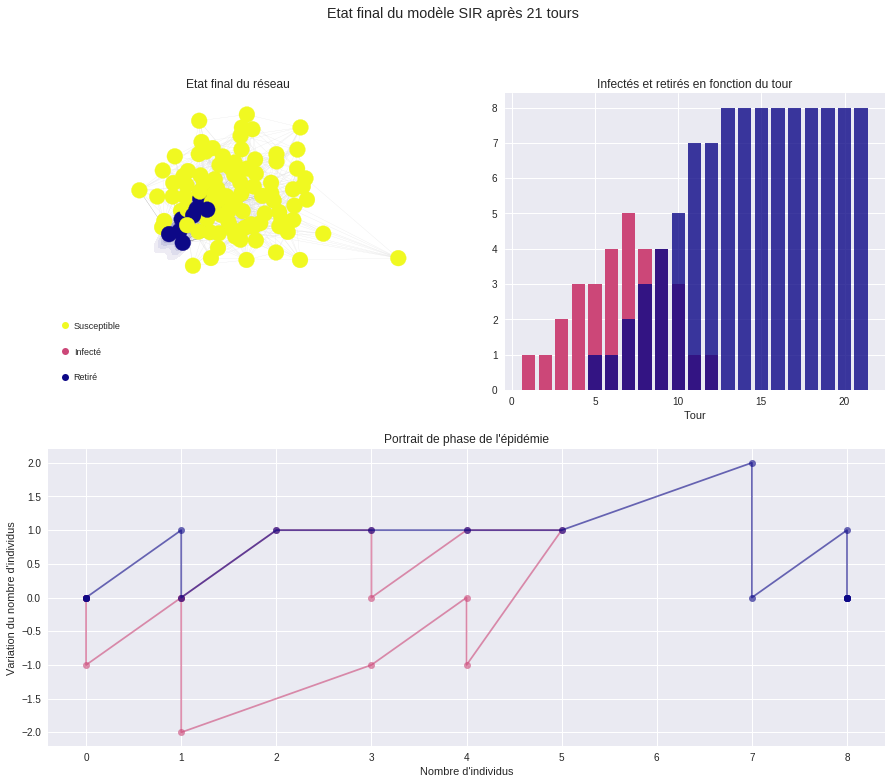

In [7]:
s = Sirs(100, [3, 21], 0.1, graph=0.07)
s.increment(20)
s.plot()

# Modèle d'arbre
L'arbre a deux comportements typiques, selon la valeur de R0.

## Etouffement
Cas fréquent pour $R_0 << 1$.

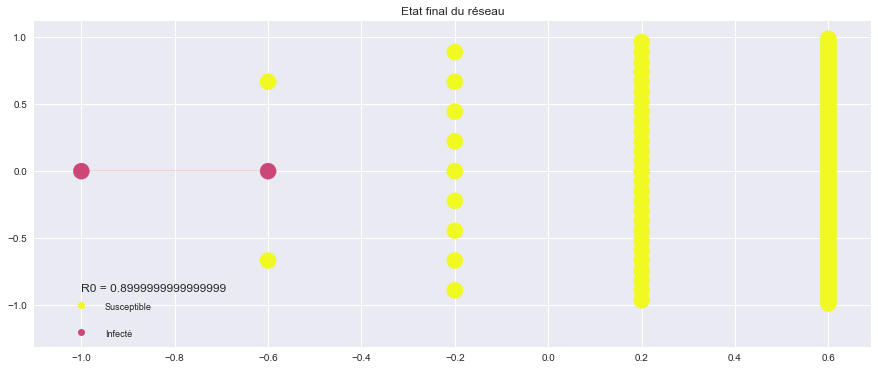

In [11]:
branching.plot(n=5, k=3, p=0.3)

# Survie et multiplication
Cas fréquent pour $R_0 >> 1$.

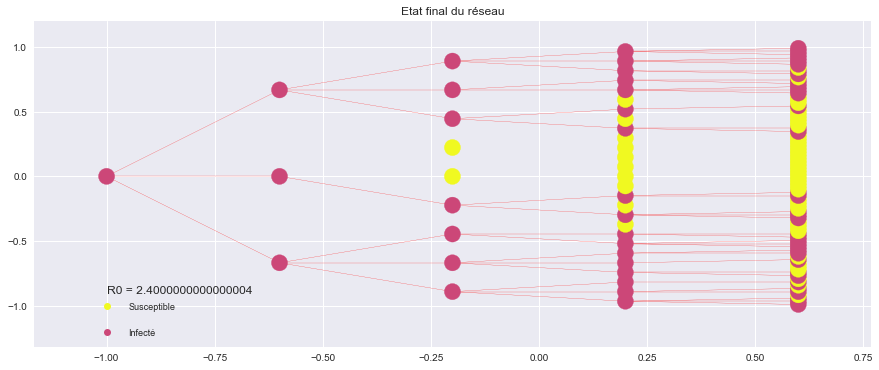

In [8]:
branching.plot(n=5, k=3, p=0.8)

# Oscillations dans le modèle SIRS
On peut obtenir des oscillations dans le modèle SIRS, grace à des synchronisations d'immunité. En moyenne, les oscillations finissent par se stabiliser en intensité afin qu'un peu moins de la moitié de la population soit contaminée à tout moment.

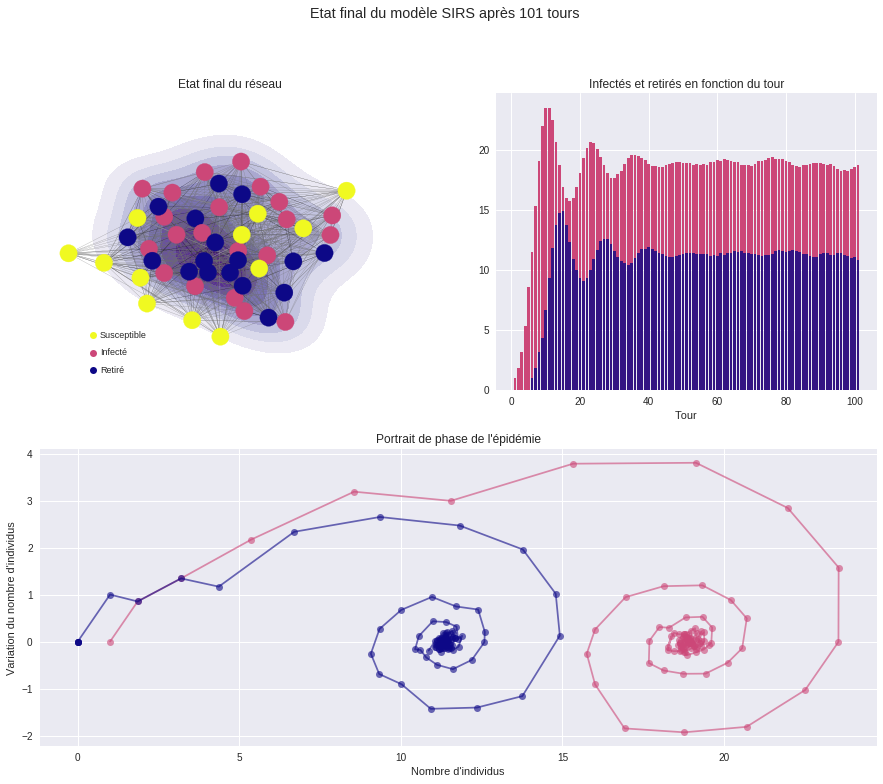

In [24]:
s = Sirs(n=50)
s.increment_avg(100)
s.plot()

On observe ces oscillations dans l'animation:

(il faut avoir lancé `sirs_animate.py` auparavant)

In [10]:
%%HTML
<video autoplay loop>
    <source src="animate/final.mkv" type="video/mp4">
</video>

# Modèle Watts et Strogatz
Les graphes *Watts et Strogatz* permettent de créer des graphes de type "petit monde", où les personnes sont rassmblées en petits groupes qui sont reliés entre eux.

Dans le modèle **SIRS**, cela donne lieu à des oscillations, avec des synchronisations entre les sous-groupes.

On constate de plus que certains sous-groupes se trouvent isolés du reste de l'épidémie.

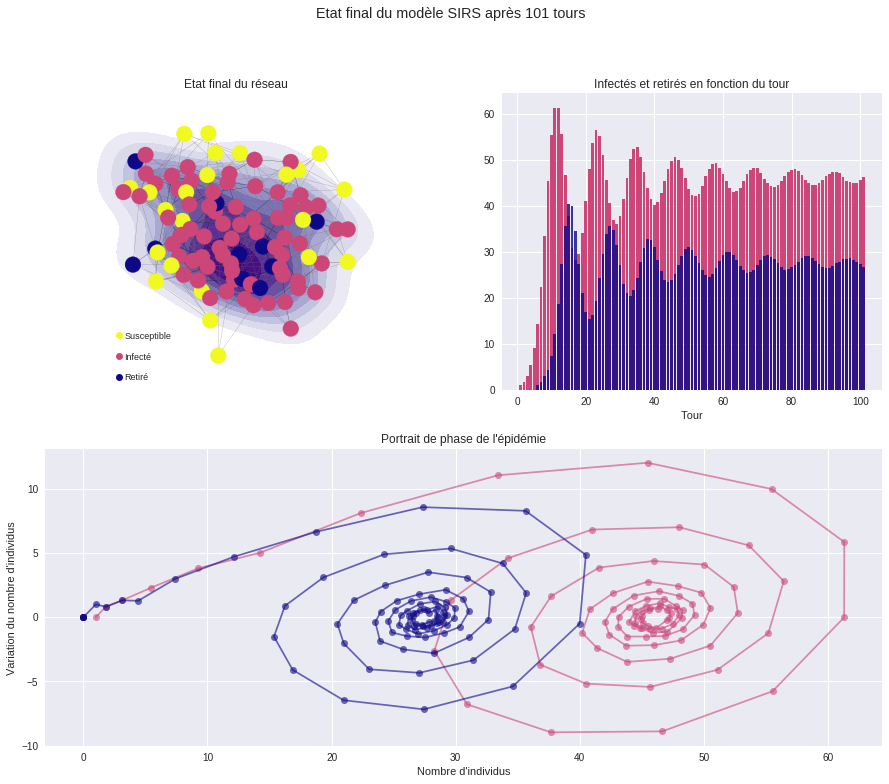

In [11]:
g = nx.watts_strogatz_graph(100, 6, 0.5)
s = Sirs(graph=g, p=0.2)
s.increment_avg(100)
s.plot()

On notera cette fois-ci que les oscillations s'annulent pour faire disparaitre l'épidémie ou perdurent en s'amortissant, dépendant des cas, pour des probabilités voisines, menant donc a penser qu'il existe un seuil de quelque sorte.

On notera que tout le monde n'est pas touché, les cliques se font repérer.

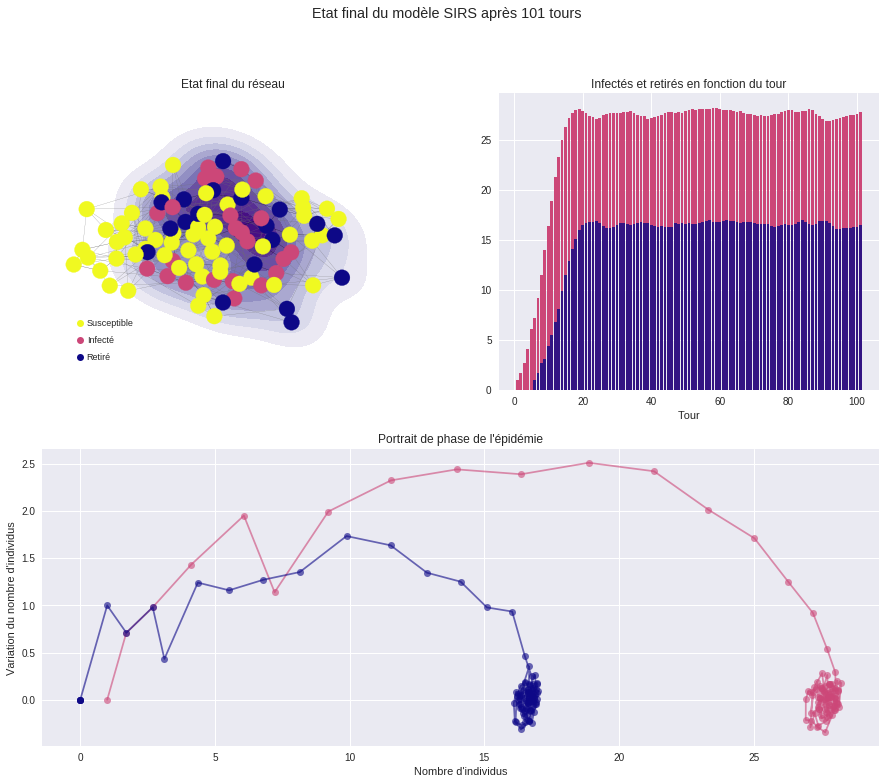

In [20]:
g = nx.watts_strogatz_graph(100, 6, 0.5)
s = Sirs(graph=g, p=0.1)
s.increment_avg(100)
s.plot()

# Graphe 'barbell'
Le graphe barbell donne un cas spécial de 'petit monde'. L'épidémie n'a qu'un court passage pour traverser.

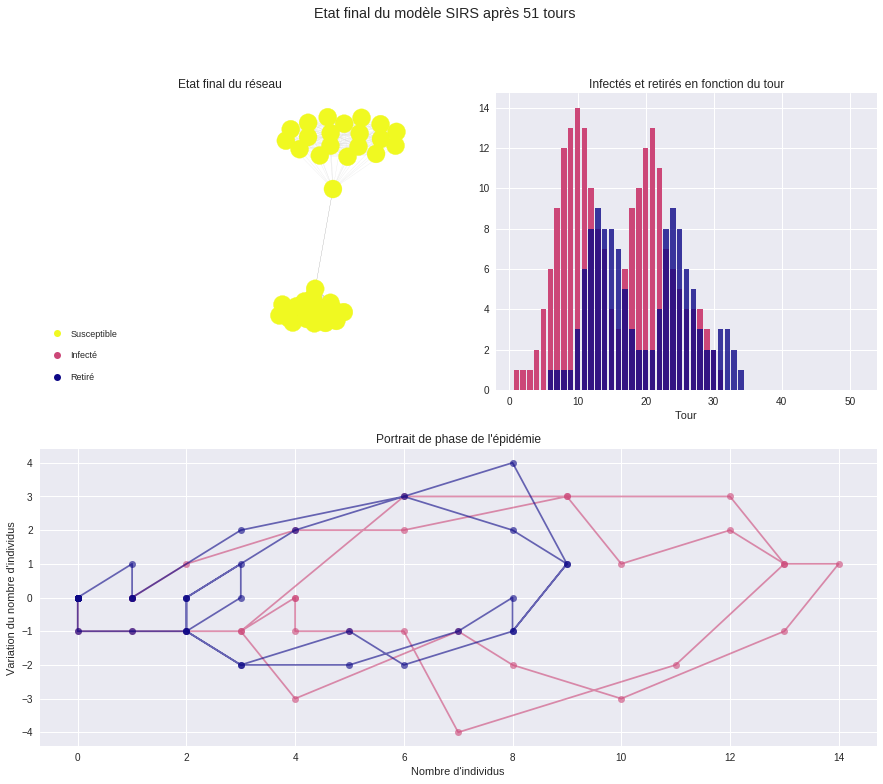

In [25]:
g = nx.barbell_graph(20, 0)
s = Sirs(graph=g)
s.increment(50)
s.plot()

En moyenne, ce genre de graphe permet à l'épidémie de survivre temporairement, mais finit par la tuer.

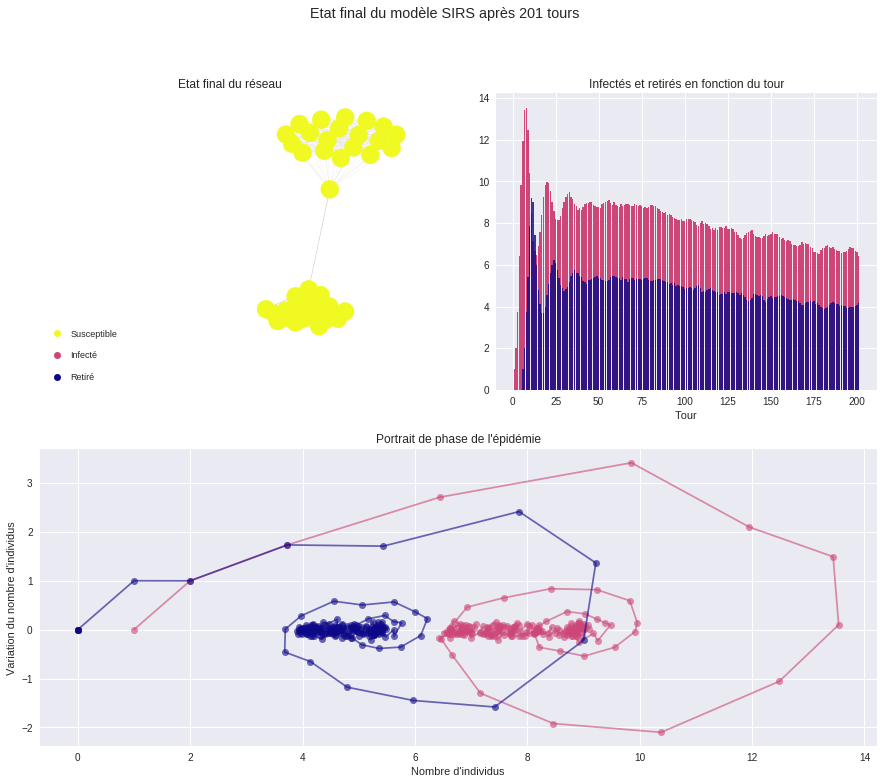

In [26]:
s = Sirs(graph=g)
s.increment_avg(200)
s.plot()